# Irony Detection in English 

#### The goal of this project consists in training a model capable of performing the task of classificating a tweet in English as ironic or non ironic.

Using different classification techniques we intend to find the one that performs better using as training data a data set with around 4000 tweets of different types.

This project was made by 3 students as part of the Artificial Intelligence course at FEUP. You are free to use the code for any purpose, but beware that this is just an academia project in an introductory course to Artificial Intelligence.

### Datasets:

The data sets for this project are not owned by our group, they are supplied by SemEval competition and are free to use for academic purposes only outside of the competition.

There are two data sets available, one marked for train and the other for testing. Originally they were in .txt format, but in order to simplify the work of the pandas library, we manually converted those files to .csv

**SemEval organization themselves already provide a division of the dataset in two subsets, a test dataset and a train dataset.**

This division is useful for the final evaluation of our work. Since the competition was in 2018, the ranking of the participants for that dataset is already public. This way we are able to keep track of which place we could score in that professional competition



![title](../assets/ranking.png)
##### Fig1: Ranking of the SemEval competition

#### Problem with word delimeter

Pandas is a library perfect for the job of reading data from a file, since it setup automaticaly the capability of seeing that data in a formatted organized way.

Pandas has specific functions to read from different formats. 4000 tweets in JSON would turn the data file really dense in information.
Since we are dealing with just 2 attributes, it is pointless to make our life harder in this step. We chose .csv format to represent the data

CSV files dealing with text rise other problem, the fact that people use comma in their texts, pandas. So we introduce other delimiter that exists in Portuguese, but doesn't exist in english "_ç", so we are able to do the task

In [2]:
from IPython.display import display, HTML
import pandas
import numpy

train_data=pandas.read_csv('data/train.csv', engine='python', encoding="utf-8",delimiter="_ç")
test_data=pandas.read_csv('data/test-labeled.csv',engine='python', encoding="utf-8",delimiter="_ç")

In [3]:
train_data.head()

,label,tweet
0,1,Sweet United Nations video. Just in time for C...
1,1,@mrdahl87 We are rumored to have talked to Erv...
2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,0,3 episodes left I'm dying over here
4,1,"""I can't breathe!"" was chosen as the most nota..."


In [4]:
test_data.head()

,label,tweet
0,0,@Callisto1947 Can U Help?||More conservatives ...
1,1,"Just walked in to #Starbucks and asked for a ""..."
2,0,#NOT GONNA WIN http://t.co/Mc9ebqjAqj
3,0,@mickymantell He is exactly that sort of perso...
4,1,So much #sarcasm at work mate 10/10 #boring 10...


### Analising the data

With both of our data sets loaded, we can use **Matplotlib** to see how our data is distributed.

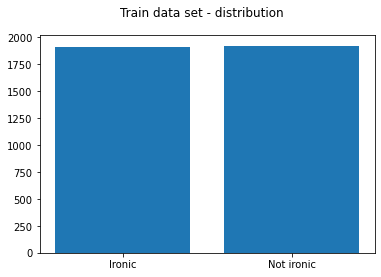

Ironic tweets -  1911
Non Ironic tweets -  1923
Percentage of ironic tweets -  49.84350547730829


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
train_data_ntrue=train_data['label'].sum()
train_data_nfalse=train_data['label'].count()-train_data_ntrue
values=[train_data_ntrue,train_data_nfalse]
names=['Ironic','Not ironic']
plt.bar(names,values)
plt.suptitle('Train data set - distribution')
plt.show()
print('Ironic tweets - ',train_data_ntrue)
print('Non Ironic tweets - ',train_data_nfalse)
print('Percentage of ironic tweets - ',train_data_ntrue*1.0/train_data['label'].count()*100.0)

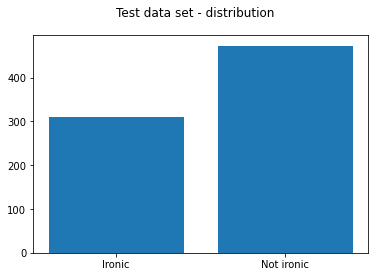

Ironic tweets -  311
Non Ironic tweets -  473
Percentage of ironic tweets -  39.66836734693878


In [6]:
test_data_ntrue=test_data['label'].sum()
test_data_nfalse=test_data['label'].count()-test_data_ntrue
values=[test_data_ntrue,test_data_nfalse]
names=['Ironic','Not ironic']
plt.suptitle('Test data set - distribution')
plt.bar(names,values)
plt.show()
print('Ironic tweets - ',test_data_ntrue)
print('Non Ironic tweets - ',test_data_nfalse)
print('Percentage of ironic tweets - ',test_data_ntrue*1.0/test_data['label'].count()*100.0)


While the training data set has a marginally small difference between the number of ironic and non ironic tweets, the same can't be said for the test data set.
In our second graph, its visually palpable that the number of non ironic tweets is significantly larger.

### Bag of words

Now that we have the data in a pandas data set we need to proceed our path of finding an accurate model to identify ironic tweets. For that we need to parse our tweets to a **bag of words** model format.

A bag of words is a model which tweet will see their words tokenized and counted by a specified formula. Where we have 2 essential paths that we can follow:

* Use a simple counting of words.
* Use the TF-IDF measure

##### The process of getting as input the raw text and output a bag of words is called **Vectorization**



## Data Preprocessing

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
stemmer = PorterStemmer()

for i in range(0, len(train_data)):
    tweet = train_data['tweet'][i]
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    #Lowercase words
    tweet = tweet.lower().split()
    #Stemming
    tweet = ' '.join([stemmer.stem(w) for w in tweet if not w in set(stopwords.words('english'))])
    corpus.append(tweet)
print(corpus)

['sweet unit nation video. time christmas. imagin noreligion', "rumor talk erv' agent... angel ask ed escobar... that' hardli noth ;)", 'hey there! nice see minnesota/nd winter weather', "3 episod left i'm die", '"i can\'t breathe!" chosen notabl quot year annual list releas yale univers librarian', 'never old footi pajamas.', 'noth make happier get highway see break light light like christma tree..', '4:30 open first beer gonna long night/day', 'think would support guy knock daughter? rice deserv support.', 'allow open christma day!', 'oh, thank god - entir offic email system down... day big event. santa, know get xmas.', "instead, i'm scroll facebook, instagram, twitter hour end, accomplish nothing.", '😡 bloodi upstair get chang !', "cold warmth suffus one' cheek pink (colour/tone) ... understand underli differ & texture?", 'great mobil bill arriv text', "crush great realiz they'll never interest you.| :p", 'buffalo sport media smarter us. els get qualiti insight offer harrington bus

## Initial analysis

In order to have a objective evaluation criteria to our final answer to this problem, it is important to make a fast initial analysis to the data without any kind of pre processing to the data, using the simplest model possible a naive bayes analyses.

#### Simple Word Counter Vetorization
#### Train Data

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=False)

X_train=count_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

#### Test Data

In [7]:
# Here we just Transform. Because the vocabulary is the one from the test set
X_test=count_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

In [8]:
classifier=GaussianNB()

classifier.fit(X_train,y_train)

y_predicted=classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.64      0.42      0.51       473
           1       0.42      0.65      0.51       311

    accuracy                           0.51       784
   macro avg       0.53      0.53      0.51       784
weighted avg       0.56      0.51      0.51       784

[[199 274]
 [110 201]]


In [9]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       473
           1       0.53      0.53      0.53       311

    accuracy                           0.63       784
   macro avg       0.61      0.61      0.61       784
weighted avg       0.63      0.63      0.63       784

[[328 145]
 [145 166]]


In [ ]:
# Neural Network

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

In [15]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       473
           1       0.61      0.25      0.36       311

    accuracy                           0.64       784
   macro avg       0.63      0.57      0.55       784
weighted avg       0.63      0.64      0.59       784

[[423  50]
 [233  78]]


In [12]:
# SVM

from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
y_predicted=classifier.predict(X_test)

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       473
           1       0.57      0.62      0.59       311

    accuracy                           0.66       784
   macro avg       0.65      0.66      0.65       784
weighted avg       0.67      0.66      0.67       784

[[328 145]
 [118 193]]


### TF-IDF Word Counter Vetorization

#### Train Data

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer=TfidfVectorizer(analyzer='word', stop_words='english', lowercase=False)

X_train=tf_idf_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

#### Test Data

In [10]:
X_test=tf_idf_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

In [193]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

classificator=GaussianNB()

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)



#Metrics Raw
accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')

print(classification_report(y_test,y_predicted))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predicted))



initial_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

              precision    recall  f1-score   support

           0       0.64      0.45      0.53       473
           1       0.42      0.60      0.50       311

    accuracy                           0.51       784
   macro avg       0.53      0.53      0.51       784
weighted avg       0.55      0.51      0.52       784

Confusion Matrix
[[215 258]
 [123 188]]


### Initial Data Analys

The raw analysis of the perfomance of the simple model is pretty bellow the best scores of the competition:

In [194]:
initial_conclusion

,Our Results,Winners Result
Accuracy,0.514031,0.7347
Precision,0.550978,0.6304
F1-Value,0.516916,0.8006


#### The differences are relevant. We need to introduce data pre processing to our project in order to improve the data

Other element relevant is that using simple word counting or TF-IDF doesn't produce any kind of relevant difference in the results achieved


## Data pre processing process

Without any data preprocessing the vocabulary of the testing set was 14042
Normalization

#### Remove Web Hyperlinks from tweets

In [195]:
train_data['tweet']=train_data['tweet'].str.replace('http\S+|www.\S+', '', case=False)

#Deletes any kind of empty tweet that was left after removing links
train_data.replace('', numpy.nan, inplace=True)
train_data.dropna(subset=['tweet'],inplace=True)

display(HTML(train_data.to_html()))

,label,tweet
0,1,Sweet United Nations video. Just in time for Christmas. #imagine #NoReligion
1,1,@mrdahl87 We are rumored to have talked to Erv's agent... and the Angels asked about Ed Escobar... that's hardly nothing ;)
2,1,Hey there! Nice to see you Minnesota/ND Winter Weather
3,0,3 episodes left I'm dying over here
4,1,"""I can't breathe!"" was chosen as the most notable quote of the year in an annual list released by a Yale University librarian"
5,0,You're never too old for Footie Pajamas.
6,1,Nothing makes me happier then getting on the highway and seeing break lights light up like a Christmas tree..
7,0,4:30 an opening my first beer now gonna be a long night/day
8,0,@Adam_Klug do you think you would support a guy who knocked out your daughter? Rice doesn't deserve support.
9,0,@samcguigan544 You are not allowed to open that until Christmas day!


#### Normalization of Twitter mentions

In twitter is mandatory to mention the person that we reply with their personal nickname. In this Social Network this mentions are done using "@" followed by a single word that identifies the nickname

In [196]:
train_data['tweet']=train_data['tweet'].str.replace('@\S+', '<person>', case=False)

display(HTML(train_data.to_html()))

,label,tweet
0,1,Sweet United Nations video. Just in time for Christmas. #imagine #NoReligion
1,1,<person> We are rumored to have talked to Erv's agent... and the Angels asked about Ed Escobar... that's hardly nothing ;)
2,1,Hey there! Nice to see you Minnesota/ND Winter Weather
3,0,3 episodes left I'm dying over here
4,1,"""I can't breathe!"" was chosen as the most notable quote of the year in an annual list released by a Yale University librarian"
5,0,You're never too old for Footie Pajamas.
6,1,Nothing makes me happier then getting on the highway and seeing break lights light up like a Christmas tree..
7,0,4:30 an opening my first beer now gonna be a long night/day
8,0,<person> do you think you would support a guy who knocked out your daughter? Rice doesn't deserve support.
9,0,<person> You are not allowed to open that until Christmas day!


#### Normalization of Uppercase words.

Goal is to reduce the vocabulary to the absolutely necessary

In [201]:
#Data Refresh
tf_idf_vectorizer=TfidfVectorizer(analyzer='word', stop_words='english', lowercase=True)

X_train=tf_idf_vectorizer.fit_transform(train_data['tweet']).toarray()
y_train=train_data['label']

In [202]:
print(len(tf_idf_vectorizer.vocabulary_))

9451


In [199]:
14042

14042

* Fazer aquela cena dos vetores de similitude vai curtir -> Encontrar duplicados
* Remover Numeros
* Fazer Stemming
* Fazer Lemmazation
* Fazer contradictions

In [221]:

X_test=tf_idf_vectorizer.transform(test_data['tweet']).toarray()
y_test=test_data['label']

classificator.fit(X_train,y_train)
#Predicition
y_predicted=classificator.predict(X_test)

print(classification_report(y_test,y_predicted))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predicted))

accuracy_value=accuracy_score(y_test,y_predicted)
precision_value=precision_score(y_test,y_predicted,average='weighted')
f1_value=f1_score(y_test,y_predicted,average='weighted')

actual_conclusion=pandas.DataFrame(
    {
    'Our Results':[accuracy_value,precision_value,f1_value],
    'Winners Result':[0.7347,0.6304,0.8006]
    } , index=['Accuracy','Precision','F1-Value'])

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       473
           1       0.46      0.57      0.51       311

    accuracy                           0.56       784
   macro avg       0.56      0.56      0.56       784
weighted avg       0.58      0.56      0.57       784

Confusion Matrix
[[265 208]
 [135 176]]


In [222]:
actual_conclusion

,Our Results,Winners Result
Accuracy,0.562500,0.7347
Precision,0.581510,0.6304
F1-Value,0.567185,0.8006
